In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd


Bad key savefig.frameon in file c:\users\niels\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file c:\users\niels\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file c:\users\niels\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log fi

In [2]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['legend.fontsize'] = 12

In [3]:
pd.set_option('display.max_rows', None)  # display all rows.
pd.set_option('display.float_format', '{:.2f}'.format)  # two decimals.

plt.style.use('grayscale')

%matplotlib inline

In [4]:
def get_all_data(method):
    data = pd.DataFrame()
    
    for experiment in range(1, 73):
        df = pd.read_csv(f"analysis/cache/{experiment}-{method}.csv")
        df["experiment"] = experiment
        
        data = data.append(df, ignore_index=True)

    return data.set_index(["experiment", "instance"])

In [5]:
heuristic = get_all_data("heuristic")
heuristic.head()

objective  instruction (# learners)  \
experiment instance                                        
1          1           4774.84                       611   
           2           4759.64                       606   
           3           4640.12                       611   
           4           4680.35                       588   
           5           4701.76                       611   

                     self-study (# learners)  activities (#)  
experiment instance                                           
1          1                             189              43  
           2                             194              43  
           3                             189              43  
           4                             212              43  
           5                             189              43

In [6]:
ilp = get_all_data("ilp")
ilp.head()

objective  instruction (# learners)  \
experiment instance                                        
1          1           4777.54                       611   
           2           4765.53                       608   
           3           4644.67                       613   
           4           4690.98                       590   
           5           4709.46                       616   

                     self-study (# learners)  activities (#)  
experiment instance                                           
1          1                             189              43  
           2                             192              43  
           3                             187              43  
           4                             210              43  
           5                             184              43

# Objectives

In [7]:
objectives = pd.DataFrame(index=heuristic.index)

objectives["ilp"] = ilp.objective
objectives["heuristic"] = heuristic.objective
objectives["percentage"] = 100 * (ilp.objective - heuristic.objective) / heuristic.objective

grouped = objectives.groupby("experiment")

In [8]:
# Sanity check: the heuristic can never perform better than the optimal
# values for each problem instance.
assert len(objectives[objectives.ilp < objectives.heuristic]) == 0

In [9]:
print("Average difference (%) between heuristic and ILP objectives:")
100 * (ilp.objective.sum() - heuristic.objective.sum()) / heuristic.objective.sum()

Average difference (%) between heuristic and ILP objectives:


0.6487416879025373

Text(0, 0.5, 'Experiments (#)')

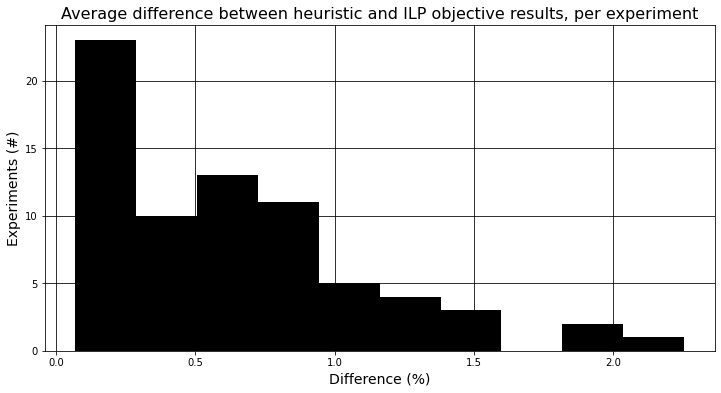

In [10]:
grouped.percentage.mean().hist(figsize=(12, 6))
plt.title("Average difference between heuristic and ILP objective results, per experiment")
plt.xlabel("Difference (%)")
plt.ylabel("Experiments (#)")

Text(0, 0.5, 'Experiments (#)')

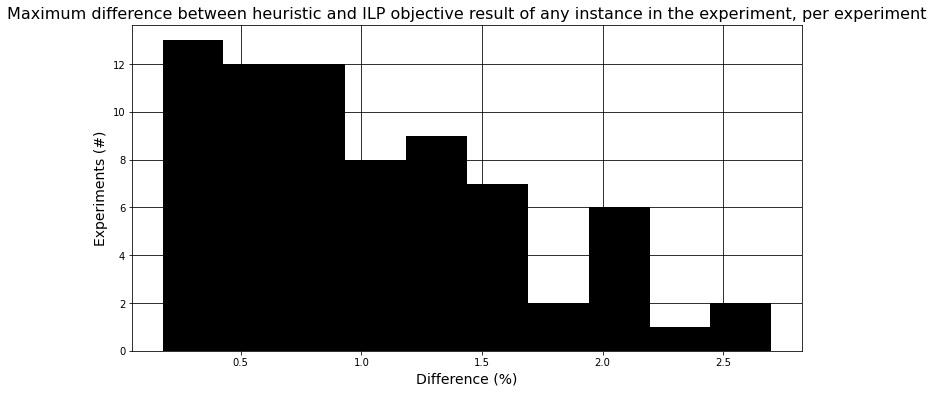

In [11]:
grouped.percentage.max().hist(figsize=(12, 6))
plt.title("Maximum difference between heuristic and ILP objective result of any instance in the experiment, per experiment")
plt.xlabel("Difference (%)")
plt.ylabel("Experiments (#)")

In [12]:
# This is used for the results table in the paper.
aggregates = grouped.aggregate({"ilp": "mean", "heuristic": "mean", "percentage": ["mean", "min", "max"]})
formatters = {("percentage", agg): "{:.2f}%".format for agg in ["mean", "min", "max"]}

# For in the appendix
print(aggregates.to_latex(longtable=True, label="tab:heuristic_performance", formatters=formatters))

\begin{longtable}{lrrrrr}
\label{tab:heuristic_performance}\\
\toprule
{} &     ilp & heuristic & \multicolumn{3}{l}{percentage} \\
{} &    mean &      mean &       mean &   min &   max \\
experiment &         &           &            &       &       \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
1          & 4726.15 &   4719.89 &      0.13\% & 0.00\% & 0.32\% \\
2          & 4717.15 &   4711.47 &      0.12\% & 0.01\% & 0.27\% \\
3          & 4720.07 &   4714.77 &      0.11\% & 0.00\% & 0.29\% \\
4          & 4845.05 &   4835.82 &      0.19\% & 0.05\% & 0.32\% \\
5          & 4853.04 &   4843.85 &      0.19\% & 0.07\% & 0.36\% \\
6          & 4800.44 &   4788.20 &      0.26\% & 0.09\% & 0.48\% \\
7          & 9773.15 &   9765.84 &      0.07\% & 0.01\% & 0.18\% \\
8          & 9751.89 &   9745.08 &      0.07\% & 0.01\% & 0.19\% \\
9          & 9751.20 &   9742.71 &      0.09\% & 0.01\% & 0.19\% \\
10         & 97

In [13]:
pct = objectives.reset_index()
pct.head()

,experiment,instance,ilp,heuristic,percentage
0,1,1,4777.54,4774.84,0.06
1,1,2,4765.53,4759.64,0.12
2,1,3,4644.67,4640.12,0.10
3,1,4,4690.98,4680.35,0.23
4,1,5,4709.46,4701.76,0.16


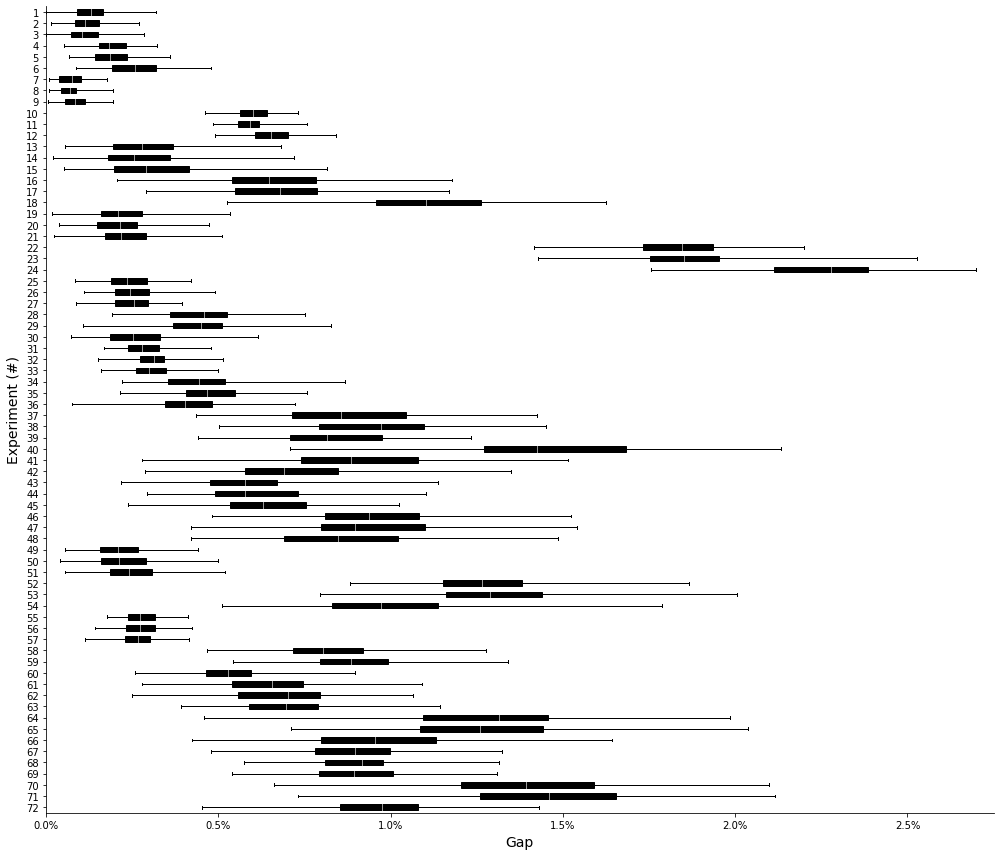

In [14]:
_, ax = plt.subplots(figsize=(14, 12))

d = pd.pivot(index='instance', columns='experiment', values='percentage', data=pct)
d.boxplot(vert=False, ax=ax, whis=(0, 100), rot=0, patch_artist=True, grid=False)

ax.invert_yaxis()

ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
ax.set_xlim([0, 2.75])

for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)

ax.set_ylabel("Experiment (#)", labelpad=5)
ax.set_xlabel("Gap", labelpad=5)

plt.tight_layout()
plt.savefig("out/gaps.pdf", bbox_inches='tight');

# Experimental results

In [15]:
width = 0.85
ylim = [-.55, 1.45]
repeat = 2

In [16]:
experiments = pd.read_excel("experiments/experiments.xlsx")
experiments.set_index("experiment", inplace=True)

data = ilp.join(experiments)
data.head()

data["self-study (% learners)"] = data["self-study (# learners)"] 
data.loc[data.learners == 800, "self-study (% learners)"] /= 8
data.loc[data.learners == 1600, "self-study (% learners)"] /= 16

In [17]:
experiments

,penalty,progress,learners,instruction_classrooms,instruction_size,self_study_classrooms,self_study_size,num_teachers,first_degree,second_degree,third_degree
experiment,,,,,,,,,,,
1,1,0,800,40,32,3,80,80,1.00,0.00,0.00
2,1,0,800,40,32,3,80,80,0.50,0.50,0.00
3,1,0,800,40,32,3,80,80,0.40,0.40,0.20
4,1,0,800,80,16,3,80,80,1.00,0.00,0.00
5,1,0,800,80,16,3,80,80,0.50,0.50,0.00
6,1,0,800,80,16,3,80,80,0.40,0.40,0.20
7,1,0,1600,80,32,6,80,160,1.00,0.00,0.00
8,1,0,1600,80,32,6,80,160,0.50,0.50,0.00
9,1,0,1600,80,32,6,80,160,0.40,0.40,0.20


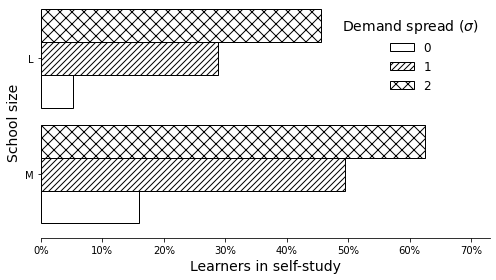

In [18]:
grouped = data.groupby(["learners", "progress"])
ax = grouped["self-study (% learners)"].mean().unstack(1).plot.barh(yticks=[0, 1, 2],
                                                                    figsize=(7, 4), 
                                                                    width=width,
                                                                    edgecolor='black',
                                                                    facecolor='white')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_xlabel("Learners in self-study")
ax.set_ylabel("School size")
ax.set_yticklabels(["M", "L"])

for spine in ['right', 'left', 'top']:
    ax.spines[spine].set_visible(False)

for bar, hatch in zip(ax.patches, ['', '', '//', '//', 'x', 'x']):
    bar.set_hatch(hatch * repeat)
    
ax.legend(title="Demand spread ($\\sigma$)", frameon=False)
ax.set_ylim(ylim)
ax.set_xlim([0, 73])

plt.tight_layout()
plt.savefig("out/progress.pdf", bbox_inches='tight');

In [19]:
print(grouped["self-study (% learners)"].mean())
print(grouped["self-study (# learners)"].mean())

learners  progress
800       0          15.95
          1          49.48
          2          62.50
1600      0           5.30
          1          28.90
          2          45.50
Name: self-study (% learners), dtype: float64
learners  progress
800       0          127.63
          1          395.81
          2          500.02
1600      0           84.76
          1          462.38
          2          728.04
Name: self-study (# learners), dtype: float64


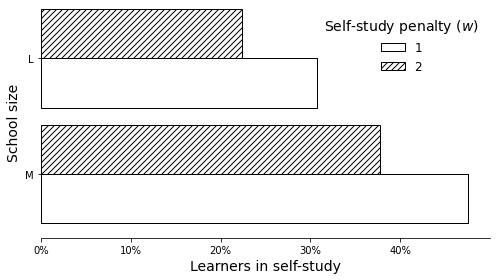

In [20]:
grouped = data.groupby(["learners", "penalty"])
ax = grouped["self-study (% learners)"].mean().unstack(1).plot.barh(figsize=(7, 4), 
                                                                    width=width,
                                                                    edgecolor='black',
                                                                    facecolor='white')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_xlabel("Learners in self-study")
ax.set_ylabel("School size")
ax.set_yticklabels(["M", "L"])

for spine in ['right', 'left', 'top']:
    ax.spines[spine].set_visible(False)

for bar, hatch in zip(ax.patches, ['', '', r'//', r'//']):
    bar.set_hatch(hatch * repeat)

ax.legend(title="Self-study penalty ($w$)", frameon=False)
ax.set_ylim(ylim)

plt.tight_layout()
plt.savefig("out/penalty.pdf", bbox_inches='tight');

In [21]:
print(grouped["self-study (% learners)"].mean())
print(grouped["self-study (# learners)"].mean())

learners  penalty
800       1         47.55
          2         37.73
1600      1         30.76
          2         22.37
Name: self-study (% learners), dtype: float64
learners  penalty
800       1         380.43
          2         301.82
1600      1         492.20
          2         357.92
Name: self-study (# learners), dtype: float64


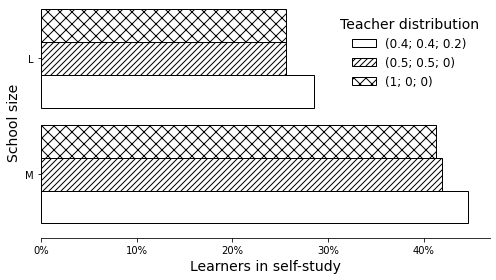

In [22]:
grouped = data.groupby(["learners", "first_degree"])
ax = grouped["self-study (% learners)"].mean().unstack(1).plot.barh(figsize=(7, 4),
                                                                    width=width,
                                                                    edgecolor='black',
                                                                    facecolor='white')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_xlabel("Learners in self-study")
ax.set_ylabel("School size")
ax.set_yticklabels(["M", "L"])

for spine in ['right', 'left', 'top']:
    ax.spines[spine].set_visible(False)

    
for bar, hatch in zip(ax.patches, ['', '', '//', '//', 'x', 'x']):
    bar.set_hatch(hatch * repeat)

ax.legend(["(0.4; 0.4; 0.2)", "(0.5; 0.5; 0)", "(1; 0; 0)"], title="Teacher distribution", frameon=False)
ax.set_ylim(ylim)

plt.tight_layout()
plt.savefig("out/teacher_distribution.pdf", bbox_inches='tight');

In [23]:
print(grouped["self-study (% learners)"].mean())
print(grouped["self-study (# learners)"].mean())

learners  first_degree
800       0.40           44.65
          0.50           41.95
          1.00           41.32
1600      0.40           28.50
          0.50           25.64
          1.00           25.56
Name: self-study (% learners), dtype: float64
learners  first_degree
800       0.40           357.18
          0.50           335.57
          1.00           330.58
1600      0.40           455.99
          0.50           410.24
          1.00           408.96
Name: self-study (# learners), dtype: float64


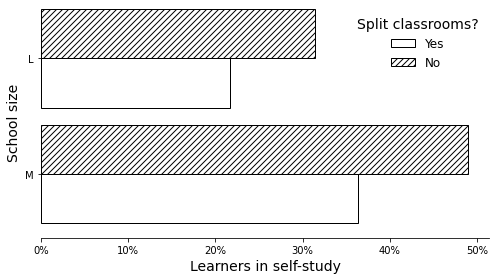

In [24]:
grouped = data.groupby(["learners", "instruction_size"])
ax = grouped["self-study (% learners)"].mean().unstack(1).plot.barh(figsize=(7, 4),
                                                                    width=width,
                                                                    edgecolor='black',
                                                                    facecolor='white')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_xlabel("Learners in self-study")
ax.set_ylabel("School size")
ax.set_yticklabels(["M", "L"])

for spine in ['right', 'left', 'top']:
    ax.spines[spine].set_visible(False)
    
for bar, hatch in zip(ax.patches, ['', '', '//', '//']):
    bar.set_hatch(hatch * repeat)

ax.legend(["Yes", "No"], title="Split classrooms?", frameon=False)
ax.set_ylim(ylim)

plt.tight_layout()
plt.savefig("out/split_classroom.pdf", bbox_inches='tight');

In [25]:
print(grouped["self-study (% learners)"].mean())
print(grouped["self-study (# learners)"].mean())

learners  instruction_size
800       16                 36.34
          32                 48.94
1600      16                 21.67
          32                 31.46
Name: self-study (% learners), dtype: float64
learners  instruction_size
800       16                 290.74
          32                 391.52
1600      16                 346.79
          32                 503.33
Name: self-study (# learners), dtype: float64
